# Craft Beers Analysis

This notebook contains data exploration and preparation steps for the Craft Beers dataset merged from `beers.csv` and `breweries.csv`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged dataset
df = pd.read_csv('craft_beers_dataset.csv')
df.head()

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state,abv_percent,abv_category
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR,5.0,Medium
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN,6.6,High
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN,7.1,High
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN,9.0,High
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN,7.5,High


In [4]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   abv           2348 non-null   float64
 1   ibu           1405 non-null   float64
 2   id            2410 non-null   int64  
 3   name          2410 non-null   object 
 4   style         2405 non-null   object 
 5   brewery_id    2410 non-null   int64  
 6   ounces        2410 non-null   float64
 7   brewery_name  2410 non-null   object 
 8   city          2410 non-null   object 
 9   state         2410 non-null   object 
 10  abv_percent   2348 non-null   float64
 11  abv_category  2410 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 226.1+ KB


In [5]:
# Summary statistics
df.describe()

,abv,ibu,id,brewery_id,ounces,abv_percent
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000,2348.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241,5.977342
std,0.013542,25.954066,752.459975,157.685604,2.352204,1.354173
min,0.001000,4.000000,1.000000,0.000000,8.400000,0.100000
25%,0.050000,21.000000,808.250000,93.000000,12.000000,5.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000,5.600000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000,6.700000
max,0.128000,138.000000,2692.000000,557.000000,32.000000,12.800000


In [6]:
# Check for missing values
df.isna().sum()

abv               62
ibu             1005
id                 0
name               0
style              5
brewery_id         0
ounces             0
brewery_name       0
city               0
state              0
abv_percent       62
abv_category       0
dtype: int64

In [7]:
# Drop rows with missing target variable (abv_percent)
df_clean = df.dropna(subset=['abv_percent'])

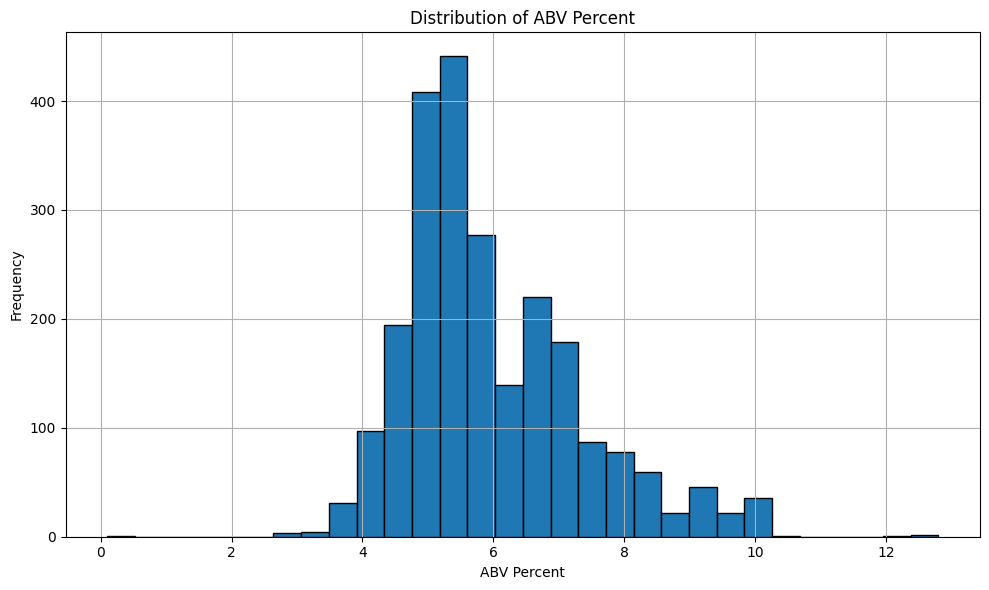

In [8]:
# Histogram of ABV Percent
plt.figure(figsize=(10, 6))
plt.hist(df_clean['abv_percent'], bins=30, edgecolor='black')
plt.title('Distribution of ABV Percent')
plt.xlabel('ABV Percent')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## Next Steps
- Explore other feature distributions (e.g., IBU, SRM)
- Consider transformations for right-skewed features
- Begin feature selection and modeling prep

## Target Variable: `abv_percent`

In this section, we focus on the target variable **`abv_percent`**, which represents the alcohol by volume percentage of each beer.

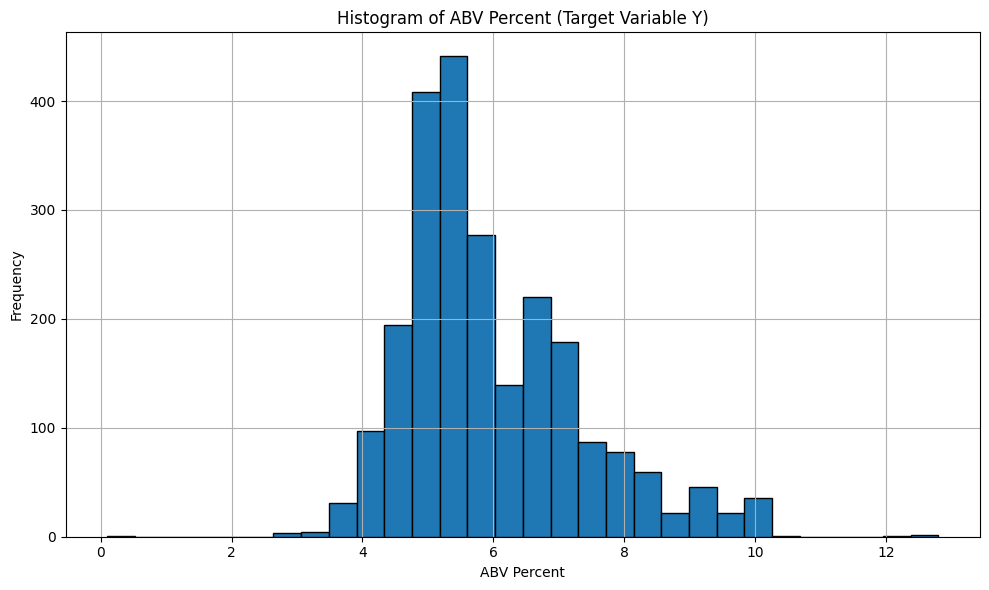

In [9]:
# Histogram of ABV Percent (Target Variable Y)
plt.figure(figsize=(10, 6))
plt.hist(df_clean['abv_percent'], bins=30, edgecolor='black')
plt.title('Histogram of ABV Percent (Target Variable Y)')
plt.xlabel('ABV Percent')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
df_clean.loc[:, 'ibu'] = df_clean.groupby('style')['ibu'].transform(lambda x: x.fillna(x.mean()))


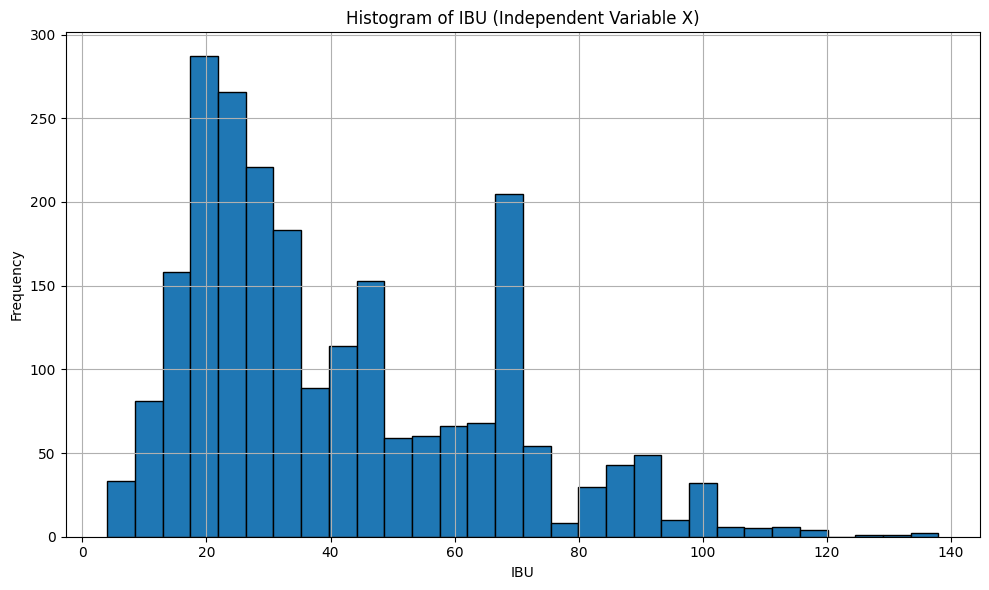

In [14]:
# Histogram of ibu (Independent Variable X)
plt.figure(figsize=(10, 6))
plt.hist(df_clean['ibu'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of IBU (Independent Variable X)')
plt.xlabel('IBU')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
